## 서울시 대기질 분석을 통한 도시 대기질 개선 방안 제안
### 서울의 대기질 데이터를 분석하여 도시 환경 개선 및 건강 향상을 위한 방안을 제시하는 프로젝트이다. 다양한 측정소에서 수집된 대기오염 물질(SO2, CO, NO2, PM10, PM2.5)의 측정값을 바탕으로 서울의 대기질을 평가하고, 오염 추세를 분석하며, 계절별 및 지역별 대기질의 차이를 분석하여 도시 대기질 개선을 위한 정책을 제안하는 것이 목표이다.
#### 1. 데이터 전처리
#### 수집된 대기질 데이터를 정리하고, 결측치 및 이상치를 처리하여 신뢰할 수 있는 분석을 위한 데이터를 준비한다.
#### 2. 지역별 및 계절별 분석
#### 대기질 데이터를 지역별, 계절별로 분리하여 대기질의 지역적 차이와 게절적 변화를 분석한다.
#### 3. 시각화 및 지도화
#### 대기오염 수준을 시각화하여, 서울의 대기질 상태를 직관적으로 이해할 수 있도록 지도에 표시하고, 대기질이 나쁜 지역을 시각적으로 나타낸다.
#### 4. 예측 모델링
#### 과거의 대기질 데이터를 기반으로 Random Forest 회귀 모델을 사용하여 미래의 대기질을 예측하고, 예측 성능을 MAE(평균 절대 오차) 및 RMSE(평균 제곱근 오차) 등의 지표로 평가한다.
#### 5. 정책 제안
#### 분석 결과를 바탕으로 대기질 개선을 위한 정책을 제안한다. 도시 숲 조성, 교통 관리 등을 통해 대기질을 개선할 수 있는 방안을 제시한다.
### 이 프로젝트는 대기질 데이터를 활용하여 도시 환경과 공공 건강을 개선하는 데 기여하며, 정책 결정자들이 실질적인 개선책을 마련하는 데 도움이 될 것이다.

In [1]:
#노트북 환경이 좋지 않아 깔끔하게 한 번에 파일이 불러와지지 않아 하나씩 불러온 후 데이터를 분석하였습니다.
import pandas as pd #데이터 분석을 위한 pandas 호출. pandas 라이브러리를 import(호출)하는데, 앞으로 pd라고 부르겠다는 의미
#한 번에 불러오면 주피터노트북이 멈추는 현상 발생. 1월부터 파일을 로드해서 df_1 변수에 담음.
df_1 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y1m.xlsx") #경로 문제로 인해 앞에 r 기재하여 해결
print("2023년 1월")
print(df_1)

2023년 1월
            지역       망   측정소코드 측정소명        측정일시     SO2   CO     O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023010101  0.0040  0.8  0.004  0.0550   
1        서울 중구    도시대기  111121   중구  2023010102  0.0040  0.8  0.004  0.0510   
2        서울 중구    도시대기  111121   중구  2023010103  0.0040  0.8  0.005  0.0480   
3        서울 중구    도시대기  111121   중구  2023010104  0.0040  0.7  0.014  0.0320   
4        서울 중구    도시대기  111121   중구  2023010105  0.0040  0.7  0.021  0.0210   
...        ...     ...     ...  ...         ...     ...  ...    ...     ...   
477379  인천 옹진군  국가배경농도  831495   울도  2023013120  0.0012  0.3  0.040  0.0120   
477380  인천 옹진군  국가배경농도  831495   울도  2023013121  0.0013  0.3  0.036  0.0164   
477381  인천 옹진군  국가배경농도  831495   울도  2023013122  0.0011  0.3  0.041  0.0123   
477382  인천 옹진군  국가배경농도  831495   울도  2023013123  0.0008  0.3  0.043  0.0075   
477383  인천 옹진군  국가배경농도  831495   울도  2023013124  0.0010  0.4  0.035  0.0129   

        PM10  PM25                   주소  


In [2]:
df_2 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y2m.xlsx") #2월 파일을 로드해서 df_2 변수에 담음.
print("2023년 2월")
print(df_2)

2023년 2월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023020101     NaN   NaN     NaN     NaN   
1        서울 중구    도시대기  111121   중구  2023020102     NaN   NaN     NaN     NaN   
2        서울 중구    도시대기  111121   중구  2023020103     NaN   NaN     NaN     NaN   
3        서울 중구    도시대기  111121   중구  2023020104     NaN   NaN     NaN     NaN   
4        서울 중구    도시대기  111121   중구  2023020105     NaN   NaN     NaN     NaN   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
431419  인천 옹진군  국가배경농도  831495   울도  2023022820  0.0014  0.27  0.0528  0.0096   
431420  인천 옹진군  국가배경농도  831495   울도  2023022821  0.0013  0.26  0.0548  0.0070   
431421  인천 옹진군  국가배경농도  831495   울도  2023022822  0.0016  0.26  0.0471  0.0122   
431422  인천 옹진군  국가배경농도  831495   울도  2023022823  0.0014  0.27  0.0451  0.0125   
431423  인천 옹진군  국가배경농도  831495   울도  2023022824  0.0019  0.28  0.0304  0.0225   

        PM10  PM25

In [3]:
df_3 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y3m.xlsx") #3월 파일을 로드해서 df_3 변수에 담음.
print("2023년 3월")
print(df_3)

2023년 3월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023030101  0.0025  0.45  0.0273  0.0321   
1        서울 중구    도시대기  111121   중구  2023030102  0.0028  0.46  0.0284  0.0311   
2        서울 중구    도시대기  111121   중구  2023030103  0.0028  0.39  0.0365  0.0227   
3        서울 중구    도시대기  111121   중구  2023030104  0.0024  0.35  0.0378  0.0211   
4        서울 중구    도시대기  111121   중구  2023030105  0.0027  0.45  0.0213  0.0333   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
477835  인천 옹진군  국가배경농도  831495   울도  2023033120  0.0018  0.39  0.0616  0.0088   
477836  인천 옹진군  국가배경농도  831495   울도  2023033121  0.0023  0.36  0.0641  0.0094   
477837  인천 옹진군  국가배경농도  831495   울도  2023033122  0.0021  0.29  0.0710  0.0069   
477838  인천 옹진군  국가배경농도  831495   울도  2023033123  0.0020  0.34  0.0632  0.0092   
477839  인천 옹진군  국가배경농도  831495   울도  2023033124  0.0020  0.35  0.0614  0.0092   

        PM10  PM25

In [6]:
df_4 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y4m.xlsx") #4월 파일을 로드해서 df_4 변수에 담음.
print("2023년 4월")
print(df_4)

2023년 4월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023040101  0.0045  0.74  0.0119  0.0686   
1        서울 중구    도시대기  111121   중구  2023040102  0.0045  0.72  0.0102  0.0678   
2        서울 중구    도시대기  111121   중구  2023040103  0.0042  0.76  0.0060  0.0717   
3        서울 중구    도시대기  111121   중구  2023040104  0.0042  0.73  0.0076  0.0627   
4        서울 중구    도시대기  111121   중구  2023040105  0.0036  0.71  0.0088  0.0550   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
464131  인천 옹진군  국가배경농도  831495   울도  2023043020  0.0013  0.46     NaN  0.0060   
464132  인천 옹진군  국가배경농도  831495   울도  2023043021  0.0011  0.46     NaN  0.0055   
464133  인천 옹진군  국가배경농도  831495   울도  2023043022  0.0014  0.50     NaN  0.0092   
464134  인천 옹진군  국가배경농도  831495   울도  2023043023  0.0012  0.46     NaN  0.0126   
464135  인천 옹진군  국가배경농도  831495   울도  2023043024  0.0012  0.42     NaN  0.0135   

        PM10  PM25

In [7]:
df_5 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y5m.xlsx") #5월 파일을 로드해서 df_5 변수에 담음.
print("2023년 5월")
print(df_5)

2023년 5월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023050101  0.0029  0.42  0.0467  0.0118   
1        서울 중구    도시대기  111121   중구  2023050102  0.0026  0.42  0.0414  0.0131   
2        서울 중구    도시대기  111121   중구  2023050103  0.0027  0.42  0.0373  0.0137   
3        서울 중구    도시대기  111121   중구  2023050104  0.0027  0.39  0.0388  0.0110   
4        서울 중구    도시대기  111121   중구  2023050105  0.0023  0.40  0.0355  0.0122   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
480283  인천 옹진군  국가배경농도  831495   울도  2023053120  0.0016  0.43  0.0631  0.0037   
480284  인천 옹진군  국가배경농도  831495   울도  2023053121  0.0016  0.42  0.0686  0.0036   
480285  인천 옹진군  국가배경농도  831495   울도  2023053122  0.0015  0.41  0.0659  0.0034   
480286  인천 옹진군  국가배경농도  831495   울도  2023053123  0.0015  0.39  0.0579  0.0029   
480287  인천 옹진군  국가배경농도  831495   울도  2023053124  0.0014  0.39  0.0473  0.0149   

        PM10  PM25

In [8]:
df_6 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y6m.xlsx") #6월 파일을 로드해서 df_6 변수에 담음.
print("2023년 6월")
print(df_6)

2023년 6월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023060101  0.0025  0.35  0.0447  0.0130   
1        서울 중구    도시대기  111121   중구  2023060102  0.0023  0.36  0.0415  0.0126   
2        서울 중구    도시대기  111121   중구  2023060103  0.0024  0.35  0.0412  0.0117   
3        서울 중구    도시대기  111121   중구  2023060104  0.0024  0.36  0.0370  0.0125   
4        서울 중구    도시대기  111121   중구  2023060105  0.0023  0.36  0.0342  0.0123   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
465092  인천 옹진군  국가배경농도  831495   울도  2023063020  0.0016  0.40  0.0309  0.0116   
465093  인천 옹진군  국가배경농도  831495   울도  2023063021  0.0016  0.40  0.0274  0.0091   
465094  인천 옹진군  국가배경농도  831495   울도  2023063022  0.0017  0.40  0.0369  0.0055   
465095  인천 옹진군  국가배경농도  831495   울도  2023063023  0.0017  0.40  0.0375  0.0040   
465096  인천 옹진군  국가배경농도  831495   울도  2023063024  0.0015  0.40  0.0286  0.0101   

        PM10  PM25

In [9]:
df_7 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y7m.xlsx") #7월 파일을 로드해서 df_7 변수에 담음.
print("2023년 7월")
print(df_7)

2023년 7월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023070101  0.0027  0.41  0.0249  0.0188   
1        서울 중구    도시대기  111121   중구  2023070102  0.0030  0.42  0.0263  0.0163   
2        서울 중구    도시대기  111121   중구  2023070103  0.0027  0.42  0.0218  0.0192   
3        서울 중구    도시대기  111121   중구  2023070104  0.0028  0.41  0.0131  0.0214   
4        서울 중구    도시대기  111121   중구  2023070105  0.0021  0.43  0.0131  0.0160   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
481363  인천 옹진군  국가배경농도  831495   울도  2023073120  0.0019  0.39  0.0186  0.0022   
481364  인천 옹진군  국가배경농도  831495   울도  2023073121  0.0018  0.39  0.0192  0.0028   
481365  인천 옹진군  국가배경농도  831495   울도  2023073122  0.0018  0.39  0.0157  0.0060   
481366  인천 옹진군  국가배경농도  831495   울도  2023073123  0.0019  0.40  0.0146  0.0068   
481367  인천 옹진군  국가배경농도  831495   울도  2023073124  0.0019  0.39  0.0146  0.0039   

        PM10  PM25

In [10]:
df_8 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y8m.xlsx") #8월 파일을 로드해서 df_8 변수에 담음.
print("2023년 8월")
print(df_8)

2023년 8월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023080101  0.0023  0.40  0.0146  0.0245   
1        서울 중구    도시대기  111121   중구  2023080102  0.0023  0.35  0.0223  0.0181   
2        서울 중구    도시대기  111121   중구  2023080103  0.0024  0.34  0.0184  0.0193   
3        서울 중구    도시대기  111121   중구  2023080104  0.0023  0.33  0.0190  0.0173   
4        서울 중구    도시대기  111121   중구  2023080105  0.0019  0.30  0.0216  0.0139   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
483091  인천 옹진군  국가배경농도  831495   울도  2023083120  0.0020  0.53  0.0566  0.0029   
483092  인천 옹진군  국가배경농도  831495   울도  2023083121  0.0019  0.52  0.0545  0.0028   
483093  인천 옹진군  국가배경농도  831495   울도  2023083122  0.0019  0.50  0.0537  0.0028   
483094  인천 옹진군  국가배경농도  831495   울도  2023083123  0.0019  0.52  0.0559  0.0028   
483095  인천 옹진군  국가배경농도  831495   울도  2023083124  0.0020  0.54  0.0572  0.0032   

        PM10  PM25

In [11]:
df_9 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y9m.xlsx") #9월 파일을 로드해서 df_9 변수에 담음.
print("2023년 9월")
print(df_9)

2023년 9월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023090101  0.0026  0.49  0.0125  0.0236   
1        서울 중구    도시대기  111121   중구  2023090102  0.0033  0.51  0.0076  0.0259   
2        서울 중구    도시대기  111121   중구  2023090103  0.0028  0.46  0.0099  0.0206   
3        서울 중구    도시대기  111121   중구  2023090104  0.0030  0.45  0.0106  0.0191   
4        서울 중구    도시대기  111121   중구  2023090105  0.0028  0.43  0.0092  0.0185   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
468115  인천 옹진군  국가배경농도  831495   울도  2023093020  0.0013  0.36  0.0593  0.0042   
468116  인천 옹진군  국가배경농도  831495   울도  2023093021  0.0013  0.21  0.0495  0.0038   
468117  인천 옹진군  국가배경농도  831495   울도  2023093022  0.0015  0.23  0.0487  0.0044   
468118  인천 옹진군  국가배경농도  831495   울도  2023093023  0.0016  0.21  0.0486  0.0046   
468119  인천 옹진군  국가배경농도  831495   울도  2023093024  0.0016  0.20  0.0491  0.0048   

        PM10  PM25

In [12]:
df_10 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y10m.xlsx") #10월 파일을 로드해서 df_10 변수에 담음.
print("2023년 10월")
print(df_10)

2023년 10월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023100101  0.0024  0.36  0.0386  0.0105   
1        서울 중구    도시대기  111121   중구  2023100102  0.0026  0.37  0.0327  0.0122   
2        서울 중구    도시대기  111121   중구  2023100103  0.0027  0.39  0.0322  0.0111   
3        서울 중구    도시대기  111121   중구  2023100104  0.0030  0.35  0.0365  0.0084   
4        서울 중구    도시대기  111121   중구  2023100105  0.0027  0.35  0.0361  0.0083   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
484339  인천 옹진군  국가배경농도  831495   울도  2023103120  0.0018  0.46  0.0547  0.0035   
484340  인천 옹진군  국가배경농도  831495   울도  2023103121  0.0018  0.45  0.0545  0.0037   
484341  인천 옹진군  국가배경농도  831495   울도  2023103122  0.0019  0.44  0.0533  0.0055   
484342  인천 옹진군  국가배경농도  831495   울도  2023103123  0.0019  0.44  0.0572  0.0034   
484343  인천 옹진군  국가배경농도  831495   울도  2023103124  0.0019  0.43  0.0562  0.0039   

        PM10  PM2

In [13]:
df_11 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y11m.xlsx") #11월 파일을 로드해서 df_11 변수에 담음.
print("2023년 11월")
print(df_11)

2023년 11월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023110101  0.0031  0.39  0.0423  0.0124   
1        서울 중구    도시대기  111121   중구  2023110102  0.0028  0.38  0.0428  0.0115   
2        서울 중구    도시대기  111121   중구  2023110103  0.0028  0.36  0.0444  0.0096   
3        서울 중구    도시대기  111121   중구  2023110104  0.0025  0.36  0.0433  0.0101   
4        서울 중구    도시대기  111121   중구  2023110105  0.0032  0.37  0.0443  0.0099   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
469099  인천 옹진군  국가배경농도  831495   울도  2023113020  0.0018  0.42  0.0378  0.0032   
469100  인천 옹진군  국가배경농도  831495   울도  2023113021  0.0018  0.43  0.0382  0.0030   
469101  인천 옹진군  국가배경농도  831495   울도  2023113022  0.0017  0.42  0.0377  0.0031   
469102  인천 옹진군  국가배경농도  831495   울도  2023113023  0.0017  0.43  0.0375  0.0030   
469103  인천 옹진군  국가배경농도  831495   울도  2023113024  0.0018  0.47  0.0362  0.0047   

        PM10  PM2

In [14]:
df_12 = pd.read_excel(r"C:\Users\jsk57\Downloads\2023\2023\2023y12m.xlsx") #12월 파일을 로드해서 df_12 변수에 담음.
print("2023년 12월")
print(df_12)

2023년 12월
            지역       망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0        서울 중구    도시대기  111121   중구  2023120101  0.0026  0.37  0.0245  0.0106   
1        서울 중구    도시대기  111121   중구  2023120102  0.0027  0.36  0.0269  0.0070   
2        서울 중구    도시대기  111121   중구  2023120103  0.0023  0.34  0.0268  0.0071   
3        서울 중구    도시대기  111121   중구  2023120104  0.0025  0.39  0.0243  0.0102   
4        서울 중구    도시대기  111121   중구  2023120105  0.0025  0.39  0.0208  0.0141   
...        ...     ...     ...  ...         ...     ...   ...     ...     ...   
485083  인천 옹진군  국가배경농도  831495   울도  2023123120  0.0010  0.73  0.0415  0.0086   
485084  인천 옹진군  국가배경농도  831495   울도  2023123121  0.0013  0.73  0.0409  0.0095   
485085  인천 옹진군  국가배경농도  831495   울도  2023123122  0.0014  0.77  0.0414  0.0111   
485086  인천 옹진군  국가배경농도  831495   울도  2023123123  0.0013  0.71  0.0411  0.0112   
485087  인천 옹진군  국가배경농도  831495   울도  2023123124  0.0015  0.74  0.0402  0.0098   

        PM10  PM2

In [18]:
#데이터 전처리: 서울 지역 데이터 필터링(지역 및 주소 열을 활용함)
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12] #1월-12월 데이터를 병합하여 df_list 변수에 담음
df_2023 = pd.concat(df_list, ignore_index=True) #pd.concat 사용해서 데이터를 하나의 DataFrame으로 병합함. ignore_index=True로 기존 인덱스를 무시하고 새로운 인덱스를 생성함.

df_seoul = df_2023[df_2023["지역"].str.contains("서울")] #데이터에서 "서울" 지역만 필터링 해서 df_seoul 변수에 담음

print("2023년 서울 지역 데이터")
print(df_seoul)

df_seoul.to_csv(r"C:\Users\jsk57\Downloads\2023\2023\seoul_data.csv", index=False, encoding='utf-8-sig') #필터링 된 데이터를 csv 파일로 노트북 로컬 폴더에 저장함. csv파일이 excel파일보다 용량도 절약되는 등 장점이 더 많다고 판단하여 csv로 저장함. 노트북의 좋지 않은 환경 특성상 해당 주피터노트북 파일이 작동하지 않을 때를 대비하여 로컬 파일로 저장한 것.

2023년 서울 지역 데이터
             지역      망   측정소코드 측정소명        측정일시     SO2    CO      O3     NO2  \
0         서울 중구   도시대기  111121   중구  2023010101  0.0040  0.80  0.0040  0.0550   
1         서울 중구   도시대기  111121   중구  2023010102  0.0040  0.80  0.0040  0.0510   
2         서울 중구   도시대기  111121   중구  2023010103  0.0040  0.80  0.0050  0.0480   
3         서울 중구   도시대기  111121   중구  2023010104  0.0040  0.70  0.0140  0.0320   
4         서울 중구   도시대기  111121   중구  2023010105  0.0040  0.70  0.0210  0.0210   
...         ...    ...     ...  ...         ...     ...   ...     ...     ...   
5211956  서울 노원구  도로변대기  111312  화랑로  2023123120  0.0026  0.89  0.0022  0.0403   
5211957  서울 노원구  도로변대기  111312  화랑로  2023123121  0.0027  0.94  0.0019  0.0364   
5211958  서울 노원구  도로변대기  111312  화랑로  2023123122  0.0026  0.99  0.0019  0.0356   
5211959  서울 노원구  도로변대기  111312  화랑로  2023123123  0.0019  0.95  0.0022  0.0275   
5211960  서울 노원구  도로변대기  111312  화랑로  2023123124  0.0025  0.93  0.0020  0.0306   

         PM

In [19]:
#데이터 전처리: 결측치 처리
missing_summary = df_seoul.isnull().sum() #데이터의 결측치를 확인함
print(missing_summary) 

지역           0
망            0
측정소코드        0
측정소명         0
측정일시         0
SO2      10919
CO       13392
O3        6597
NO2       6382
PM10      8158
PM25      6754
주소           0
dtype: int64


In [21]:
#대기오염 물질 데이터(SO2, CO, O3, NO2, PM10, 0M25)에 결측치가 있음을 확인
#시간적으로 연속성이 있는 데이터이므로 선형 보간법을 사용하여 결측치를 채움

df_seoul = df_2023[df_2023["지역"].str.contains("서울")].copy() #copy() 매서드를 사용하여 원본 데이터에서 df_seoul을 생성할 때 명시적으로 복사본임을 지정. 해당 줄이 없으면 SettingWithCopyWarning 경고가 발생함.

#보간법 적용
df_seoul['SO2'] = df_seoul['SO2'].interpolate(method='linear')
df_seoul['CO'] = df_seoul['CO'].interpolate(method='linear')
df_seoul['O3'] = df_seoul['O3'].interpolate(method='linear')
df_seoul['NO2'] = df_seoul['NO2'].interpolate(method='linear')
df_seoul['PM10'] = df_seoul['PM10'].interpolate(method='linear')
df_seoul['PM25'] = df_seoul['PM25'].interpolate(method='linear')

In [23]:
#결측치가 남아있는지 확인함
print(df_seoul.isnull().sum())

지역       0
망        0
측정소코드    0
측정소명     0
측정일시     0
SO2      0
CO       0
O3       0
NO2      0
PM10     0
PM25     0
주소       0
dtype: int64


In [24]:
#데이터 전처리: 이상치 처리 - 대기질 데이터에서 이상치는 장비 오류나 입력 오류로 인한 것일 가능성이 있음으로 이상치 제거 결정
#이상치를 탐지하는 함수를 정의함.
#특정 컬럼의 IQR(Interquartile Range)을 사용하여 이상치를 탐지함. 여기서 이상치는 Q1-1.5*IQR보다 작거나, Q3+1.5*IQR보다 큰 값을 의미함.
def detect_outliers(df, column): #df는 DataFrame으로 이상치를 탐지할 데이터프레임이고, column은 str로 이상치를 탐지할 컬럼명임.
    Q1 = df[column].quantile(0.25) #1사분위수(Q1): 데이터의 하위 25% 값을 구함.
    Q3 = df[column].quantile(0.75) #3사분위수(Q3): 데이터의 삼위 25% 값을 구함.
    IQR = Q3 - Q1 #3사분위수에서 1사분위수를 뺀 값으로, 데이터의 중간 50% 범위임.
    lower_bound = Q1 - 1.5 * IQR #하한(lower_bound): IQR의 1.5배를 1사분위수에서 뺸 값으로, 이보다 작은 값을 이상치로 간주함.
    upper_bound = Q3 + 1.5 * IQR #상한(upper_bound) = IQR의 1.5배를 3사분위수에 더한 값으로, 이보다 큰 값을 이상치로 간주함.
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)] #이상치 조건을 만족하는 행만 필터링하여 반환함.

#SO2, CO, O3, NO2, PM10, PM25 컬럼에서 이상치를 탐지함.
for col in ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']:
    outliers = detect_outliers(df_seoul, col) #각 컬럼별로 delete_outliers: 함수를 호출하여 이상치를 탐지함.
    print(f'{col} 이상치 수: {len(outliers)}') #이상치 개수를 출력함.

SO2 이상치 수: 9256
CO 이상치 수: 15548
O3 이상치 수: 7785
NO2 이상치 수: 6305
PM10 이상치 수: 22758
PM25 이상치 수: 20437


In [186]:
# IQR을 활용한 이상치 탐지 후 NaN으로 대체
for col in ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']:
    Q1 = df_seoul[col].quantile(0.25)
    Q3 = df_seoul[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 NaN으로 대체
    df_seoul.loc[(df_seoul[col] < lower_bound) | (df_seoul[col] > upper_bound), col] = None

# 대기오염 물질의 시간적 연속성을 고려해 선형 보간법을 사용하여 NaN 대체
for col in ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']:
    df_seoul[col] = df_seoul[col].interpolate(method='linear')
    
df_seoul.to_csv(r"C:\Users\jsk57\Downloads\2023\2023\seoul_data_final.csv", index=False, encoding='utf-8-sig') #필터링 된 데이터를 csv 파일로 노트북 로컬 폴더에 저장함.

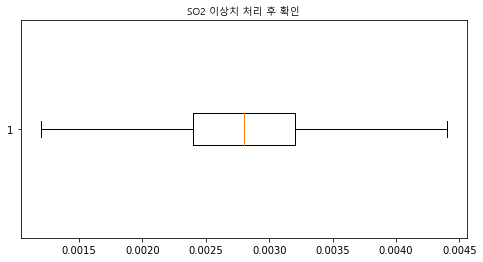

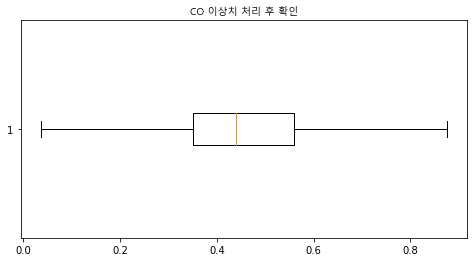

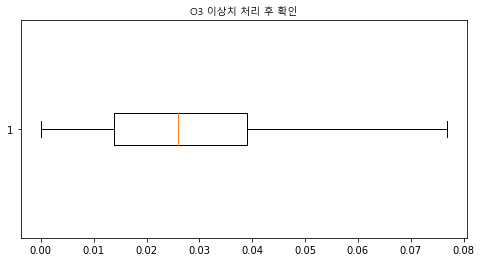

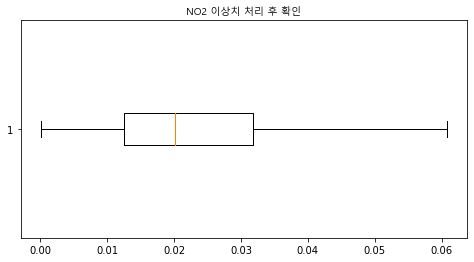

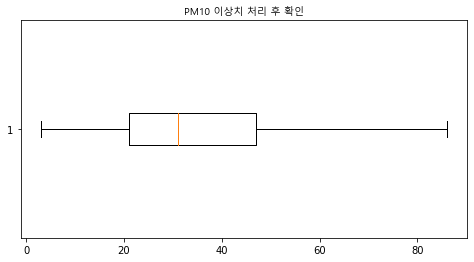

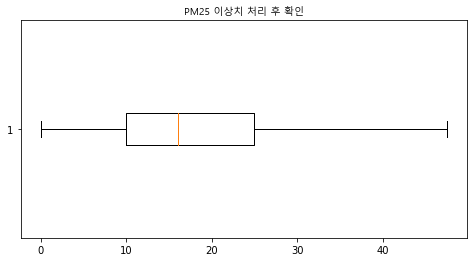

In [35]:
#이상치 처리 후 이상치가 있는지 확인함.
import matplotlib.pyplot as plt #matplotlib 호출. 앞으로 plt라고 부르겠다는 의미.
import matplotlib.font_manager as fm #matplotlib.font_manager 호출. 앞으로 fm이라고 부르겠다는 의미.

#한글 폰트 경로 지정
font_path = "C:/Windows/Fonts/malgun.ttf" #'맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path) #FontProperties를 통해 한글 폰트를 matplotlib에 추가함.

# 이상치 처리 후 데이터 분포를 박스플롯을 통해 시각화함.
for col in ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']:
    plt.figure(figsize=(8, 4)) #각 플롯의 크기를 지정함.
    plt.boxplot(df_seoul[col].dropna(), vert=False) #dropna로 결측치를 제거하고 박스플롯을 생성함.
    plt.title(f'{col} 이상치 처리 후 확인', fontproperties=font_prop) #플롯 제목 추가, 한글 폰트 적용.
    plt.show() #플롯 표시

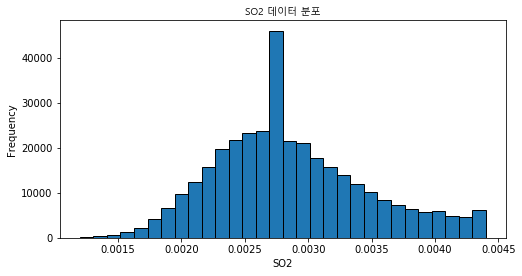

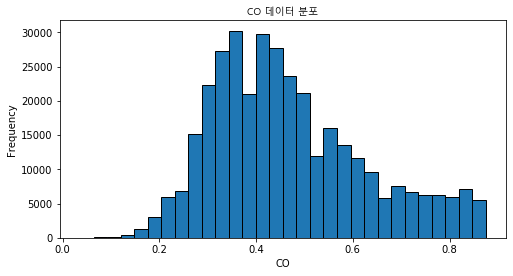

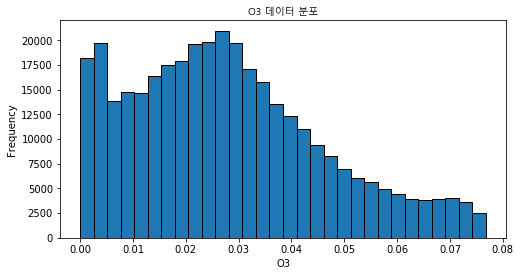

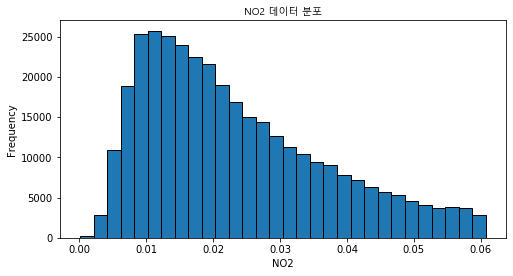

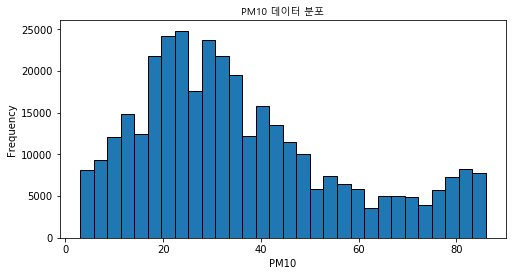

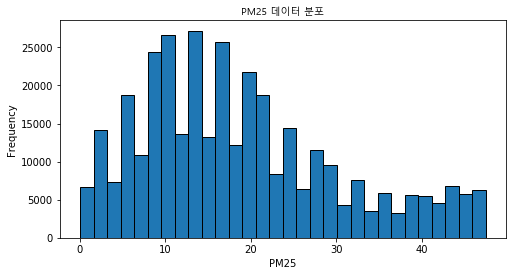

In [38]:
#이상치 제거 후 남은 데이터가 어떻게 분포되어 있는지 확인하기 위해 히스토그램을 이용함.

for col in ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']:
    plt.figure(figsize=(8, 4)) #각 그래프의 크기를 지정함.
    plt.hist(df_seoul[col].dropna(), bins=30, edgecolor='k') #dropna로 결측치를 제거하고 히스토그램을 생성함. bins=30으로 막대의 개수를 30으로 설정함. edgecolor='k'로 막대 테두리 색상을 검정색으로 설정함.
    plt.title(f'{col} 데이터 분포', fontproperties=font_prop) #그래프 제목 추가, 한글 폰트 적용.
    plt.xlabel(col) #x축 레이블 설정함. (분석 열 이름을 그대로 사용)
    plt.ylabel('Frequency') #y축 레이블 설정함. (빈도수)
    plt.show() #그래프 표시

In [67]:
#데이터 전처리: 월별 데이터를 추출할 수 있도록 연도, 월 열을 생성함.

#측정일시를 문자열로 변환함.
df_seoul['측정일시'] = df_seoul['측정일시'].astype(str)

#측정일시가 정확히 10자리인지 확인하여 유효한 데이터만 필터링 함.
df_seoul = df_seoul[df_seoul['측정일시'].str.len() == 10]

#측정일시를 datetime 형식으로 변환함.
df_seoul['측정일시'] = pd.to_datetime(df_seoul['측정일시'], format='%Y%m%d%H', errors='coerce')

# datetime 변환 실패한 데이터를 제거함.
df_seoul = df_seoul.dropna(subset=['측정일시'])

#연도와 월을 추출하여 새로운 열 생성함.
df_seoul['연도'] = df_seoul['측정일시'].dt.year
df_seoul['월'] = df_seoul['측정일시'].dt.month

#연도와 월별로 그룹화하여 평균값을 계산함.
monthly_data = df_seoul.groupby(['연도', '월'])[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean().reset_index()

print(monthly_data)

      연도   월       SO2        CO        O3       NO2       PM10       PM25
0   2023   1  0.003196  0.628317  0.014624  0.031689  48.749718  26.138330
1   2023   2  0.003131  0.580045  0.020250  0.032152  47.570846  30.597190
2   2023   3  0.003276  0.548346  0.030937  0.030529  69.497800  30.836541
3   2023   4  0.002802  0.437169  0.035456  0.021885  63.864723  21.434249
4   2023   5  0.002926  0.407343  0.038727  0.020694  40.007544  18.249760
5   2023   6  0.002749  0.418704  0.044717  0.018351  29.586358  17.019302
6   2023   7  0.002779  0.400013  0.034279  0.017241  27.347671  16.767018
7   2023   8  0.002709  0.380741  0.032192  0.016027  22.158371  13.477359
8   2023   9  0.002671  0.403432  0.029807  0.017011  21.389322  11.592595
9   2023  10  0.002804  0.473810  0.024108  0.023655  29.178421  15.345701
10  2023  11  0.002762  0.490386  0.021045  0.023855  31.596329  17.007544
11  2023  12  0.002810  0.588518  0.016404  0.029831  37.108505  21.497539


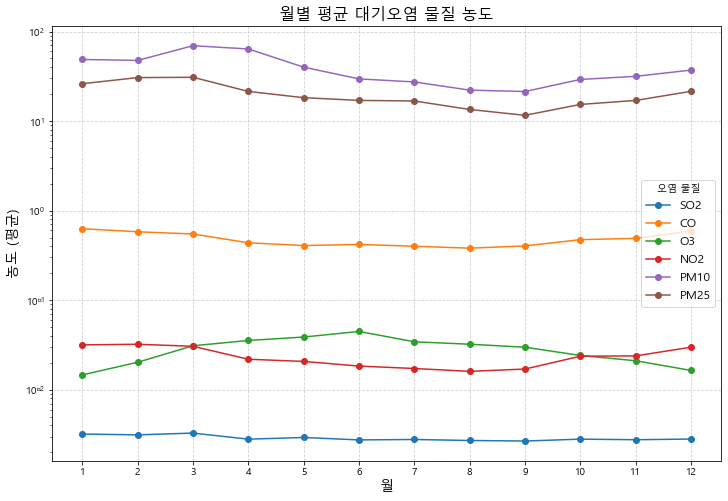

In [110]:
import matplotlib.pyplot as plt
from matplotlib import rc
import logging

#'-'[U+2212] 관련 메시지가 뜨는 경우를 처리함. 시각화한 그래프가 매우 원활하게 나오고, 여기서 해당 메시지는 값에 영향을 미치지 않으므로 전혀 중요한 부분이 아니라고 판단함, 
#이번에만 matplotlib에서만 출력되는 로그 메시지를 차단하는 것이 시각화한 그래프를 보기에 더 적합하다고 결정.
logging.getLogger('matplotlib').setLevel(logging.ERROR)

rc('font', family=font_prop.get_name()) #한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False  #마이너스 기호 문제 해결을 위해 사용함.

plt.figure(figsize=(12, 8)) #그래프 크기 설정

pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25'] #오염 물질 리스트

for pollutant in pollutants: #각 오염 물질에 대한 월별 평균 농도를 시각화함.
    plt.plot(monthly_data['월'], monthly_data[pollutant], marker='o', label=pollutant) #각 물질별로 월별 데이터와 그래프에 플롯을 점과 선으로 표시함.

#그래프 제목과 축 레이블을 설정함.
plt.title('월별 평균 대기오염 물질 농도', fontsize=16) #제목
plt.xlabel('월', fontsize=14) #x축 레이블
plt.ylabel('농도 (평균)', fontsize=14) #y축 레이블 
plt.yscale('log') #y축을 로그 스케일로 설정하여 값의 변화를 더 명확하게 보여주기 위해 사용함.
plt.xticks(monthly_data['월'])  #x축 눈금 설정
plt.legend(title='오염 물질', fontsize=12) #그래프 오른쪽에 오염 물질 이름을 표시하도록 범례를 추가함.
plt.grid(True, linestyle='--', alpha=0.6) #그래프에 격자를 추가함. 가독성을 위해 점선 스타일로 설정함.

plt.show() #그래프를 화면에 표시함.

In [114]:
#월별로 데이터를 CSV 파일로 저장함.
monthly_data.to_csv(r"C:\Users\jsk57\Downloads\2023\2023\monthly_data.csv", index=False, encoding='utf-8-sig') #월별 데이터를 csv 파일로 노트북 로컬 폴더에 저장함.

In [119]:
#지역별로 평균 농도를 계산함.
region_avg_data = df_seoul.groupby('지역')[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean().reset_index()
print(region_avg_data)

         지역       SO2        CO        O3       NO2       PM10       PM25
0    서울 강남구  0.003058  0.489611  0.028525  0.022859  39.457079  20.456279
1    서울 강동구  0.002669  0.460747  0.025420  0.024265  39.461510  19.692027
2    서울 강북구  0.002328  0.440975  0.034249  0.014425  38.068899  19.353231
3    서울 강서구  0.002956  0.466875  0.029342  0.024922  41.688977  19.208669
4    서울 관악구  0.002870  0.487079  0.031523  0.022662  41.450182  20.302013
5    서울 광진구  0.002642  0.459482  0.029880  0.020136  36.395164  18.572955
6    서울 구로구  0.002673  0.376652  0.028046  0.017121  39.470560  18.538359
7    서울 금천구  0.003114  0.479012  0.025805  0.028290  38.863108  19.724231
8    서울 노원구  0.002744  0.477615  0.026138  0.025251  39.245487  20.571058
9    서울 도봉구  0.002645  0.501524  0.034464  0.015849  35.116268  18.619053
10  서울 동대문구  0.003196  0.478214  0.029259  0.024060  38.651710  20.020599
11   서울 동작구  0.002802  0.476703  0.030575  0.026722  39.091969  20.572208
12   서울 마포구  0.002936  0.505153  0.027

In [137]:
#6종류 모두 인체에 유해하기에 전체평균의 값도 의미있을 것이라고 판단하여 각 지역별로 전체 평균을 구함.
region_avg_data['전체평균'] = region_avg_data[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean(axis=1)
print(region_avg_data[['지역', '전체평균']]) 

         지역       전체평균
0    서울 강남구  10.076235
1    서울 강동구   9.944440
2    서울 강북구   9.652351
3    서울 강서구  10.236957
4    서울 관악구  10.382721
5    서울 광진구   9.246710
6    서울 구로구   9.738902
7    서울 금천구   9.853927
8    서울 노원구  10.058049
9    서울 도봉구   9.048300
10  서울 동대문구   9.867840
11   서울 동작구  10.033496
12   서울 마포구  10.174447
13  서울 서대문구   8.948273
14   서울 서초구  10.268639
15   서울 성동구   9.877641
16   서울 성북구  10.051915
17   서울 송파구  10.126381
18   서울 양천구  10.170571
19  서울 영등포구   9.884832
20   서울 용산구  10.806643
21   서울 은평구   9.486690
22   서울 종로구   9.320097
23    서울 중구   9.660280
24   서울 중랑구   9.450086


In [122]:
#folium 라이브러리가 사용하는 branca 패키지가 jinja2 버전 3.0 이상을 필요로 하므로 호환을 위해 최신 버전으로 업데이트 함.
!pip install --upgrade jinja2

  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.1
    Uninstalling Jinja2-2.11.1:
      Successfully uninstalled Jinja2-2.11.1


In [123]:
#folium 지도 시각화를 위해 설치함.
!pip install folium

In [145]:
import folium
from IPython.display import display #falium으로 생성한 지도를 표시하기 위해 display 함수 사용

#서울을 중심으로 지도를 설정함.
map_center = [37.5665, 126.9780] #서울의 중심 좌표를 지정함.
m = folium.Map(location=map_center, zoom_start=11) #지도 생성 및 레벨 설정

#지역별 위도, 경도를 사용함.
location_data = {
    "서울 강남구": [37.5172, 127.0473],
    "서울 강동구": [37.5301, 127.1238],
    "서울 강북구": [37.6396, 127.0257],
    "서울 강서구": [37.5509, 126.8495],
    "서울 관악구": [37.4784, 126.9516],
    "서울 광진구": [37.5384, 127.0823],
    "서울 구로구": [37.4955, 126.8875],
    "서울 금천구": [37.4564, 126.8959],
    "서울 노원구": [37.6543, 127.0568],
    "서울 도봉구": [37.6688, 127.0472],
    "서울 동대문구": [37.5744, 127.0399],
    "서울 동작구": [37.5124, 126.9393],
    "서울 마포구": [37.5638, 126.9084],
    "서울 서대문구": [37.5793, 126.9368],
    "서울 서초구": [37.4836, 127.0327],
    "서울 성동구": [37.5634, 127.0365],
    "서울 성북구": [37.5894, 127.0167],
    "서울 송파구": [37.5145, 127.1057],
    "서울 양천구": [37.5169, 126.8665],
    "서울 영등포구": [37.5265, 126.8963],
    "서울 용산구": [37.5326, 126.9906],
    "서울 은평구": [37.6176, 126.9227],
    "서울 종로구": [37.5729, 126.9793],
    "서울 중구": [37.5633, 126.9977],
    "서울 중랑구": [37.6063, 127.0927]
}

#각 지역의 평균값에 따라 마커를 추가함.
for _, row in region_avg_data.iterrows(): #지역별 평균 데이터프레임을 순회함.
    region = row['지역'] #현재 행의 지역 이름을 가져옴.
    if region in location_data:  #지역이 위도/경도 데이터에 있는 경우임.
        latitude, longitude = location_data[region] #해당 지역의 위도, 경도 값을 가져옴.
        overall_avg = row['전체평균'] #전체평균 값을 가져옴.

        #전체평균 값에 따라 마커 크기와 색상을 설정함.
        if overall_avg >= 10: #평균이 10 이상일 경우
            color = 'red' #빨간색으로 표시함.
            radius = 12 #마커의 크기
        elif 9 <= overall_avg < 10: #평균이 9 이상 10 미만일 경우
            color = 'orange' #주황색으로 표시함.
            radius = 10 #마커의 크기
        else: #평균이 9 미만일 경우
            color = 'yellow' #노란색으로 표시함
            radius = 6 #마커의 크기
        
        #마커에 커서를 올려둘 경우 지역과 전체평균 조회가 가능하도록 함.
        folium.CircleMarker(
            location=[latitude, longitude], #마커의 위치를 설정함.
            radius=radius,  #값의 크기에 따라 원의 크기를 조정함.
            color=color, #외곽선 색상 설정
            fill=True, #원 내부를 채움.
            fill_color=color, #채움 색상 설정
            fill_opacity=0.7, #채움 투명도 설정
            tooltip=( #마커에 툴팁(정보 팝업) 설정. 매우 잘 기능함. 기능을 확인할 수 있도록 html 파일을 첨부함.
                f"<b>지역:</b> {region}<br>" #지역 이름 표시
                f"<b>전체평균:</b> {overall_avg:.4f}" #전체평균 값 표시
            )
        ).add_to(m)

display(m) #생성된 지도를 노트북에서 표시함.

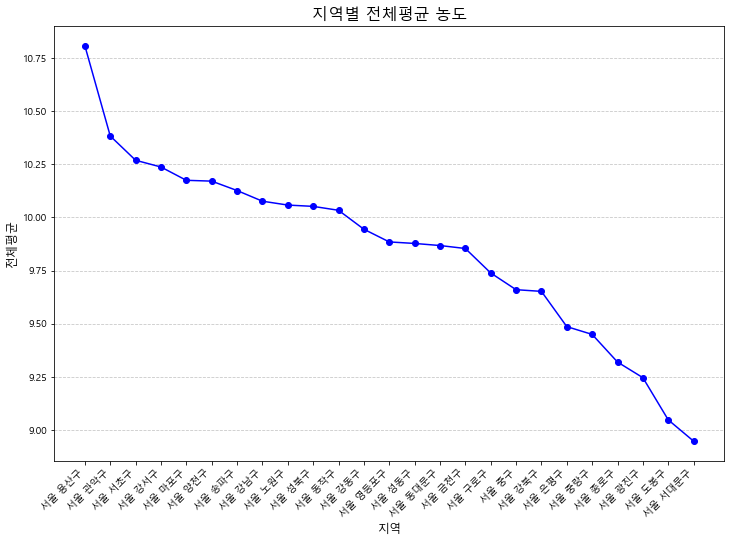

In [146]:
#대기질 공간의 순서를 분석하고자 함. 지도보다 값의 차이와 순서를 강조하기 위해 점 그래프를 생성하는 것이 다른 그래프보다 좋은 시각화가 될 것이라고 판단.
plt.figure(figsize=(12, 8)) #크기를 설정함. 
plt.plot(sorted_data['지역'], sorted_data['전체평균'], 'o-', color='blue') #점 그래프 생성. 지역별 전체평균을 x축과 y축에 매핑하고, 선으로 연결함.
plt.title('지역별 전체평균 농도', fontsize=16) #그래프 제목.
plt.xlabel('지역', fontsize=12) #x축 레이블.
plt.ylabel('전체평균', fontsize=12) #y축 레이블.
plt.xticks(rotation=45, ha='right')  #지역 이름이 겹치지 않도록 기울임 효과를 줌. 오른쪽 정렬로 설정하여 가독성을 높임.
plt.grid(axis='y', linestyle='--', alpha=0.7) #y축에 점선 스타일의 격자를 추가함. 투명도를 0.7로 설정하여 배경과 구분되게 함.

plt.show() #그래프를 화면에 표시함.

### 서울시 대기질 개선
#### 위의 지도와 그래프는 서울시 각 지역의 대기질 데이터를 종합적으로 분석한 결과를 시각화한 것이다. 지역별로 대기오염 물질의 평균 농도를 비교하고 공간적으로 분포를 확인하여 도시숲 조성 및 대기질 개선 전략에 중요한 인사이트를 제공한다.
#### 1. 지역별 대기질 차이 분석
#### 그래프는 지역별로 대기오염 물질의 전체평균 농도를 비교한 것으로, 특정 지역에서 농도가 상대적으로 높은 경향을 보이고 있다. 예를 들어, 서울 용산구와 강남구는 상대적으로 높은 평균 농도를 기록하며, 이는 교통량이 많거나 산업 활동이 집중된 지역에서 대기오염이 심각함을 알 수있다.
#### 2. 공간적 대기질 분포
#### 이러한 공간적 분포는 도시숲 조성 등 서울 대기질 개선을 위한 시설물의 최적의 위치를 선정하는 데 유용한 정보를 제공한다. 예를 들어, 도심 밀집 지역과 교통량이 많은 지역에 도시숲을 조성함으로써 대기오염 완화 효과를 극대화할 수 있다.
#### 3. 도시숲 등 대기질 개선을 위한 시설물의 필요성과 전략
#### 도시숲은 대기질 개선뿐만 아니라 온열섬 현상 완화, 탄소 흡수, 시민 건강 증진 등 다양한 긍정적 효과를 가져온다. 대기질이 높은 농도로 나타나는 지역(붉은색), 그래프의 왼쪽을 중심으로 도시숲을 조성한다면, 공기 정화 효과를 통해 주변 지역의 대기질을 개선할 수 있을 것이다. 예를 들어, 주요 도심 지역과 오염도가 높은 교차로 인근에 나무와 녹지를 조성하거나 확장하여 미세먼지와 유해가스를 흡수할 수 있는 환경을 구축하는 것이 중요하다.
#### 4. 추진 방안
#### 데이터 기반의 도시계획: 위의 시각화 자료를 활용해 도시숲 조성을 우선적으로 시행할 지역을 선정하고, 예산과 자원을 효율적으로 배분해야 한다.
### 이 분석은 서울시 대기질 개선과 관련된 정책 및 프로젝트 개발에 중요한 기초 자료로 활용될 수 있으며, 보다 나은 도시 환경을 만드는 데 기여할 것이다. 지역별 대기질 차이를 명확히 파악하고 공간적 대기질 분포를 분석함으로써, 대기오염 문제를 해결하기 위한 구체적이고 실효성 있는 전략을 제시할 수 있다. 이와 같은 데이터 기반의 접근은 서울시의 지속 가능한 발전과 환경 친화적인 도시 만들기를 위한 중요한 단계로, 향후 정책 및 계획에 실질적인 도움이 될 것이다.

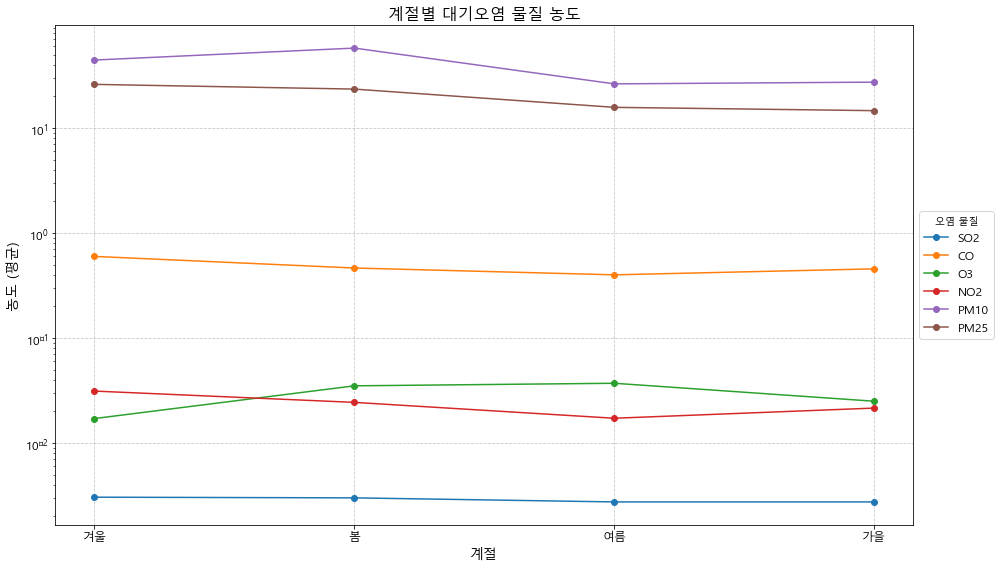

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\jsk57\Downloads\2023\2023\monthly_data.csv") #이전에 생성했던 월별 데이터 csv 파일을 불러옴.

#계절 열을 생성함.
def get_season(month): #월을 기준으로 계절을 구분함.
    if month in [12, 1, 2]: #12,1,2월은 겨울
        return '겨울'
    elif month in [3, 4, 5]: #3,4,5월은 봄
        return '봄'
    elif month in [6, 7, 8]: #6,7,8월은 여름
        return '여름'
    elif month in [9, 10, 11]: #9,10,11월은 가을
        return '가을'

data['계절'] = data['월'].apply(get_season) #월 열을 기준으로 각 계절을 적용해 계절 열을 생성함.

#가을, 겨울, 봄, 여름 순서로 그래프가 시각화되어 계절 순서를 지정해 순서대로 정렬되도록 설정함.
season_order = ['겨울', '봄', '여름', '가을']
data['계절'] = pd.Categorical(data['계절'], categories=season_order, ordered=True)

#각 계절마다 오염물질의 평균 농도를 구해 계절별 평균을 계산함.
seasonal_data = data.groupby('계절')[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean().reset_index()

#계절별 평균 농도의 결과를 시각화함.
pollutants = ['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']
plt.figure(figsize=(14, 8))  #그래프 크기 조정

#각 오염물질에 대한 계절별 농도를 선 그래프 형태로 나타냄.
for pollutant in pollutants:
    plt.plot(
        seasonal_data['계절'], seasonal_data[pollutant], marker='o', linestyle='-', label=pollutant
    )

plt.title('계절별 대기오염 물질 농도', fontsize=16) #제목
plt.xlabel('계절', fontsize=14) #x축 레이블
plt.ylabel('농도 (평균)', fontsize=14) #y축 레이블
plt.yscale('log') #y축을 로그 스케일로 설정하여 큰 값의 차이를 잘 표현해 줌.
plt.xticks(fontsize=12) #x축 레이블 폰트 크기
plt.yticks(fontsize=12) #y축 레이블 폰트 크기
plt.legend(title='오염 물질', fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))  #범례 위치를 오른쪽으로 이동함.
plt.grid(True, linestyle='--', alpha=0.7) #격자선 스타일을 설정함.
plt.tight_layout()  #그래프 요소의 간격을 자동 조정함.
plt.show() #그래프를 화면에 표시함.

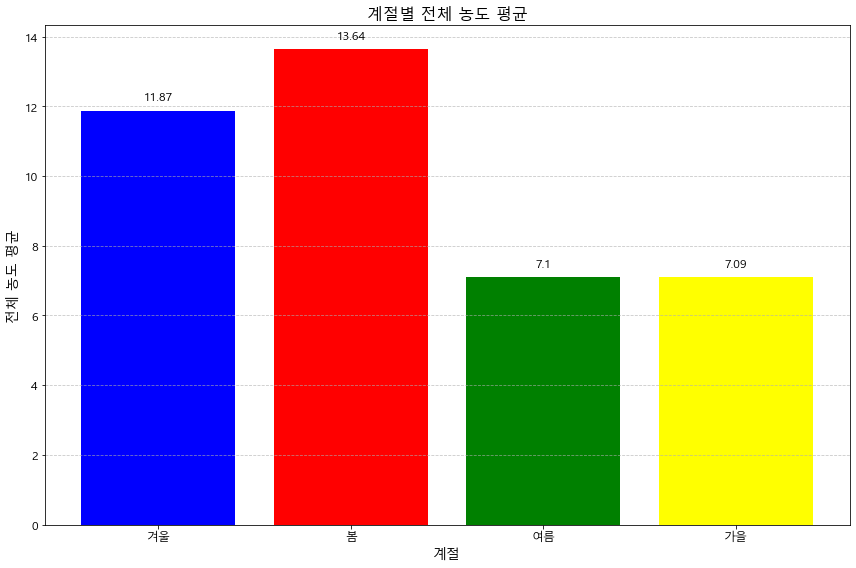

In [170]:
#마찬가지로 6종류 모두 인체에 유해하기에 전체평균의 값도 의미있을 것이라고 판단하여 계절별로 전체 평균을 구함.
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\jsk57\Downloads\2023\2023\monthly_data.csv") #이전에 생성했던 월별 데이터 csv 파일을 불러옴.

#계절 열을 생성함.
def get_season(month): #월을 기준으로 계절을 구분함.
    if month in [12, 1, 2]: #12,1,2월은 겨울
        return '겨울'
    elif month in [3, 4, 5]: #3,4,5월은 봄
        return '봄'
    elif month in [6, 7, 8]: #6,7,8월은 여름
        return '여름'
    elif month in [9, 10, 11]: #9,10,11월은 가을
        return '가을'

data['계절'] = data['월'].apply(get_season) #월 열을 기준으로 각 계절을 적용해 계절 열을 생성함.

#가을,겨울,봄,여름 순서로 그래프가 시각화되어 계절 순서를 지정해 순서대로 정렬되도록 설정함.
season_order = ['겨울', '봄', '여름', '가을']
data['계절'] = pd.Categorical(data['계절'], categories=season_order, ordered=True)

#각 날짜에 대해 6개의 오염물질의 평균을 계산하여 전체농도 열을 추가함.
data['전체농도'] = data[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean(axis=1)

#전체농도 열을 기준으로 계절별 평균을 구해서 새로운 DataFrame인 seasonal_avg에 저장함.
seasonal_avg = data.groupby('계절')['전체농도'].mean().reset_index()

#결과를 시각화함. 계절별로 평균 농도를 막대그래프로 표시함.
plt.figure(figsize=(12, 8)) #그래프 크기를 설정함.
plt.bar(seasonal_avg['계절'], seasonal_avg['전체농도'], color=['blue', 'red', 'green', 'yellow']) #각 계절에 맞는 색상을 지정함.

#각 막대 위에 전체 농도 값을 숫자로 표시함.
for i, v in enumerate(seasonal_avg['전체농도']):
    plt.text(i, v + 0.3, str(round(v, 2)), ha='center', fontsize=12) #+0.3으로 막대 위의 숫자 간격을 조절함. 봄 그래프 숫자가 잘 보이지 않아서 추가함.

plt.title('계절별 전체 농도 평균', fontsize=16) #제목
plt.xlabel('계절', fontsize=14) #x축 레이블
plt.ylabel('전체 농도 평균', fontsize=14) #y축 레이블
#축 눈금 크기를 설정함
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7) #y축에만 그리드 선을 추가함.
plt.tight_layout()  # 그래프 요소 간격을 자동 조정함.
plt.show() #그래프를 출력함.

### 대기질 개선 및 정책 제안
#### 위의 그래프는 서울시 대기질 데이터를 종합적으로 분석한 결과를 계절별로 나누어 시각화한 것이다. 계절별 대기질 데이터 분석 결과는 도시 대기질 개선 및 정책 발의의 중요한 인사이트를 제공한다. 이를 바탕으로 다양한 환경 정책 및 건강 관리 전략을 제안할 수 있다.
#### 1. 환경 정책 제안
#### 계절별 대기질 정보를 활용하여 정부나 지방 자치단체에 환경 개선을 위한 정책을 제안할 수 있다. 여름철과 겨울철 등의 대기질 차이를 분석하여, 대기 질 개선을 위한 특별 대책을 마련하는 데 사용할 수 있다. 예를 들어, 겨울철 난방 사용으로 인한 대기 오염이 심화되면, 효율적인 난방 시스템 도입을 촉구하거나, 차량의 배출가스를 줄이기 위한 교통 정책을 제안할 수 있다.
#### 2. 날씨 및 환경 변화 예측 기반 건강 관리
#### 계절별 농도를 기반으로 특정 계절의 대기질 변화를 예측할 수 있다. 계절별로 오염 물질 농도의 패턴을 기반으로, 향후 몇 년 간의 대기질 트렌드를 예측하는 데 활용할 수 있다. 예를 들어, 특정 계절에 미세먼지가 높아지는 경향이 있으면, 해당 계절에 대한 미세먼지 예보를 개선하여 시민들에게 실시간으로 경고를 발송할 수 있다.
#### 3. 계절별 농도와 다른 변수들(날씨, 교통량, 산업 활동 등) 간의 관계 분석
#### 날씨(온도, 습도)나 특정 산업 활동과 계절별 오염 물질 농도의 상관관계를 분석하여, 대기질 저하의 주요 원인을 찾아낼 수 있다. 예를 들어, 겨울철에 난방 사용이 많아지면서 대기 오염 농도가 높아지는지 파악하고, 이에 대한 대응책을 마련할 수 있다.
### 이 분석은 서울시 대기질 개선과 관련된 정책 및 프로젝트 개발에 중요한 기초 자료로 활용될 수 있으며, 보다 나은 도시 환경을 만드는 데 기여할 것이다. 효율적인 환경 정책을 제안하고 시민들의 건강을 보호할 수 있는 대응 방안을 마련할 수 있다. 또한, 실시간 대기질 예측과 경고 시스템을 개선하여 시민들에게 실질적인 도움이 될 수 있는 환경을 조성할 것이다. 이와 같은 데이터 기반의 접근은 지속 가능한 도시 환경을 위한 중요한 첫걸음이 될 것이다.

In [194]:
import pandas as pd
import numpy as np

data = pd.read_csv(r"C:\Users\jsk57\Downloads\2023\2023\seoul_data_final.csv") #전처리 데이터를 불러옴.

data['전체농도'] = data[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']].mean(axis=1) #오염물질의 평균을 계산하여 전체농도 열을 생성함.

data.dropna(subset=['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25', '전체농도'], inplace=True) #결과에 영향을 주는 행을 제거함.

#예측에 사용할 변수(x)와 타켓 변수(y)를 선택함.
X = data[['SO2', 'CO', 'O3', 'NO2', 'PM10', 'PM25']] #독립 변수들
y = data['전체농도']  #예측할 대상인 종속 변수. 즉, 전체농도.

#특성의 범위를 동일하게 맞추기 위해 StaandardScaler를 사용하여 데이터를 정규화함.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #x 데이터를 평균 0, 표준편차 1로 정규화함.

#훈련 데이터와 테스트 데이터를 80:20 비율로 분할함.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#RandomForestRegressor를 사용하여 모델을 훈련함.
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42) #100개의 트리로 랜덤 포레스트 모델을 생성함.
model.fit(X_train, y_train) #훈련 데이터를 사용하여 모델을 학습함.

#테스트 데이터에 대해 예측값을 계산함.
y_pred = model.predict(X_test)

#예측 결과와 실제 값을 비교하여 성능을 평가함.
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred) #MAE 계산 (절대 오차의 평균)
rmse = mean_squared_error(y_test, y_pred, squared=False) #RMSE 계산 (오차 제곱 평균의 제곱근)

print(f"MAE: {mae}")#MAE 출력
print(f"RMSE: {rmse}") #RMSE 출력

MAE: 0.0036779508909230477
RMSE: 0.01126249002617306


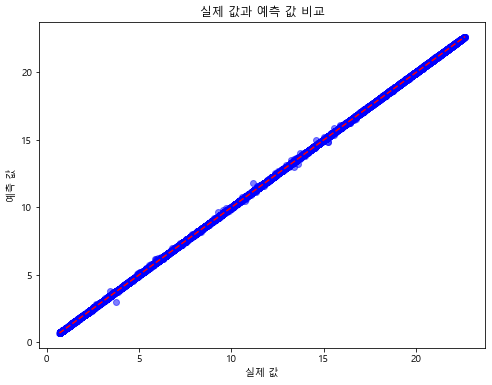

In [195]:
import matplotlib.pyplot as plt

# 실제값과 예측값 비교
plt.figure(figsize=(8, 6)) #산점도 그래프를 그리기 위한 준비, 크기 설정
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)#실제값(y_test)과 예측값(y_pred)의 관계를 산점도로 나타냄. alpha=0.5로 점의 투명도를 설정하여 중복된 점들이 보이도록 함.
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 완벽한 예측 선을 추가하여 모델의 예측 성능을 직관적으로 비교할 수 있도록 함.
plt.xlabel('실제 값') #x축 레이블
plt.ylabel('예측 값') #y축 레이블
plt.title('실제 값과 예측 값 비교') #제목
plt.show()#그래프를 출력함

### 대기질 예측 모델
#### 1. 모델 성능
#### MAE(Mean Absolute Error): 0.0037
#### 예측값과 실제값 사이의 평균 절대 오차가 0.0037이다. 이 값은 모델이 매우 정확하게 예측하고 있음을 보여준다.
#### RMSE(Root Mean Squared Error): 0.0113
#### 예측값과 실제값 사이의 제곱 평균 오차의 제곱근인 RMSE는 0.0113으로, 모델의 예측이 실제값에 매우 가까운 결과를 보였다.
#### 2. 실제값과 예측값 비교
#### 실제값과 예측값을 비교한 산점도 그래프에서는 파란색 점들이 실제값과 예측값 간의 관계를 나타내고 있다. 빨간색 점선은 완벽한 예측선을 나타내며, 모델이 실제값과 얼마나 잘 일치하는지를 시각적으로 확인할 수 있다. 그래프에서 빨간 점선에 매우 근접하고 있어, 모델이 매우 정확하게 에측했다는 것을 보여 준다.
#### 3. 결과 분석
#### 모델의 성능이 매우 우수하며, 예측값과 실제값이 거의 일치하는 모습이 그래프에서 확인된다. 이는 대기질 예측에 대한 높은 정확도를 나타낸다. MAE와 RMSE 값이 매우 낮아, 모델이 훈련 데이터에서 잘 학습되었고, 테스트 데이터에서도 높은 예측 정확도를 보였음을 의미한다.
### 이 모델은 대기질 예측을 위한 신뢰할 수 있는 도구로 사용될 수 있으며, 이를  통해 환경 정책, 건강 관리, 대기질 개선 등의 분야에서 중요한 기초 자료로 활용될 수 있다. 이 모델을 활용하여 대기오염 농도를 예측하고, 대기질이 나쁠 때 알림을 제공하는 시스템을 구축할 수 있다. 대기질이 나빠질 것으로 예상되는 시기에 환경 보호 조치를 강화하는 등의 대응이 가능한 대기질 개선을 위한 정책을 제시할 수 있다. 